<a href="https://colab.research.google.com/github/NikBaybal/Games/blob/main/games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Определение признаков успешной компьютерной игры
Предоставлены исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года.

Основная задача проекта — проанализировать данные и выявить характеристики игры, определяющее ее успешность. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

## Подготовка данных

### Загрузка данных

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install seaborn
!pip install sidetable
print()
import pandas as pd
import sidetable
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

try:
    df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/YandexPraktikum/datasets/games.csv')
except Exception:
    print('В файле обнаружена ошибка.')
else:
    print('Файл загружен, ошибок нет.')


Файл загружен, ошибок нет.


### Изучение данных

Вывод данных.

In [4]:
def info_table(data):
    print('Исходная таблица:')
    display(data)
    print()
    print('Информация о таблице:')
    print(data.info())
    print()
    print()
    print('Статистические данные количественных значений:')
    print(data.describe())

info_table(df)
print()
print('Данные о категориальных значениях:')
print(df[['Name','Platform','Genre','Rating','User_Score']].describe())

Исходная таблица:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN



Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Статистические данные количественных значений:
       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      

### Изменение типов и обработка данных

Изменение типа данных даты релиза на int для удобства использования данных в дальнейших расчетах. Приведение всех категориальных данных к нижнему регистру для избежания дубликатов.

In [5]:
df['Year_of_Release']=pd.Series(df['Year_of_Release'], dtype="Int64")
df[['Name','Platform','Genre','Rating']] = df[['Name','Platform','Genre','Rating']].apply(lambda x: x.str.lower())
display(df)
display(df.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  Int64  
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


None

Рассмотрим уникальные данные рейтинга от организации ESRB.

In [6]:
df['Rating'].value_counts()

e       3990
t       2961
m       1563
e10+    1420
ec         8
k-a        3
rp         3
ao         1
Name: Rating, dtype: int64

Устаревшее название рейтинга "k-a" заменим на "e".

In [7]:
df.loc[df['Rating']=='k-a',['Rating']]='e'
df['Rating'].value_counts()

e       3993
t       2961
m       1563
e10+    1420
ec         8
rp         3
ao         1
Name: Rating, dtype: int64

### Обработка и заполнение пропусков

In [8]:
print('Количество пропущенных значений:')
print(df.stb.missing())

Количество пропущенных значений:
                 missing  total    percent
Critic_Score        8578  16715  51.319174
Rating              6766  16715  40.478612
User_Score          6701  16715  40.089740
Year_of_Release      269  16715   1.609333
Name                   2  16715   0.011965
Genre                  2  16715   0.011965
Platform               0  16715   0.000000
NA_sales               0  16715   0.000000
EU_sales               0  16715   0.000000
JP_sales               0  16715   0.000000
Other_sales            0  16715   0.000000


Самое большое количество пропусков зафиксирована по данным оценки критиков,оценки пользователей и рейтинга от организации ESRB. Для определение связи между этими пропущенными данными выведем их пересечение.

In [9]:
print('Пропуски в столбце оценки критиков,оценки пользователей и рейтинга от организации ESRB:')
display(df[(df['Rating'].isna())&(df['Critic_Score'].isna())&(df['Critic_Score'].isna())])

Пропуски в столбце оценки критиков,оценки пользователей и рейтинга от организации ESRB:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Из вышеприведенной таблицы ясно, что пропуск в оценках пользователей, критиков и рейтинга от организации ESRB в большинстве своем по одним и тем же играм.Пока пропуски не будем заполнять, чтобы не искажать достоверность дальнейших расчетов.

Рассмотрим уникальные значения оценки пользователей.

In [10]:
print('Уникальные значения оценки пользователей:')
print(df['User_Score'].value_counts())

Уникальные значения оценки пользователей:
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64


Рассмотрим в каких строках оценка пользователей имеет значение "tbd".

In [11]:
df[df['User_Score']=='tbd']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,zumba fitness,wii,2010,sports,3.45,2.59,0.0,0.66,NaN,tbd,e
301,namco museum: 50th anniversary,ps2,2005,misc,2.08,1.35,0.0,0.54,61.0,tbd,e10+
520,zumba fitness 2,wii,2011,sports,1.51,1.03,0.0,0.27,NaN,tbd,t
645,udraw studio,wii,2010,misc,1.65,0.57,0.0,0.20,71.0,tbd,e
657,frogger's adventures: temple of the frog,gba,<NA>,adventure,2.15,0.18,0.0,0.07,73.0,tbd,e
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,2001,action,0.01,0.00,0.0,0.00,67.0,tbd,e
16697,bust-a-move 3000,gc,2003,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,e
16698,mega brain boost,ds,2008,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,e
16704,plushees,ds,2008,simulation,0.01,0.00,0.0,0.00,NaN,tbd,e


Скорее всего "tbd" означает "to be determined" (будет определено). Для использования оценок пользователей в дальнейших расчетах необходимо их перевести в тип данных float  и заменить "tbd" на NaN. Для начала "tbd" присвоим строку "100", чтобы потом заменить на NaN.

In [12]:
df.loc[df['User_Score']=='tbd','User_Score']='100'
df['User_Score'] = pd.to_numeric(df['User_Score'])
df.loc[df['User_Score']==100,'User_Score']=np.nan
print('Количество пропусков после замены "tbd" на пропуски:')
df['User_Score'].isna().sum()

Количество пропусков после замены "tbd" на пропуски:


9125

Количество пропусков увеличилось на количество значений "tbd", значит замена прошла успешно.

### Расчет суммарных продаж во всех регионах

In [13]:
df['total_sales']=df['NA_sales']+df['EU_sales']+df['JP_sales']+df['Other_sales']
display(df.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод

Все данные загружены и изучены, ошибок не обнаружено. Тип данных даты выпуска игр перевед в тип "int", значения "tbd" в столбце рейтинга заменены на пропуски, также все категориальные данные приведены к нижнему регистру.

## Исследовательский анализ данных

### Определение количества выпущенных игр по годам.

<Axes: title={'center': 'Распределение количества выпущенных игр по годам'}, xlabel='Год', ylabel='Количество выпущенных игр'>

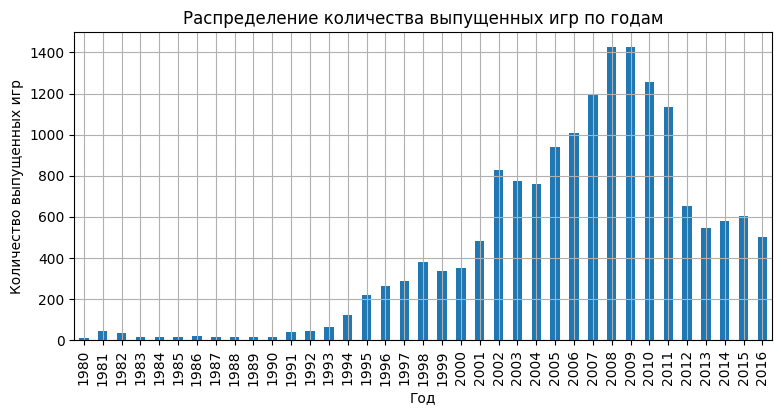

In [14]:
df_year_count=df.groupby('Year_of_Release')['NA_sales'].count()
df_year_count.plot(
    xlabel='Год',
    ylabel='Количество выпущенных игр',
    title='Распределение количества выпущенных игр по годам',
    kind='bar',
    grid=True,
    figsize=(9, 4),
    legend="",
    )

В дальнейших расчетах будем использовать данные с 2001 года, так как начиная с этого года наблюдается резкий рост популярности игр.

In [15]:
df=df.loc[df['Year_of_Release']>2000]

### Определение динамики продаж игр по платформам с течением времени

Рассмотрим как менялись продажи по платформам во времени.

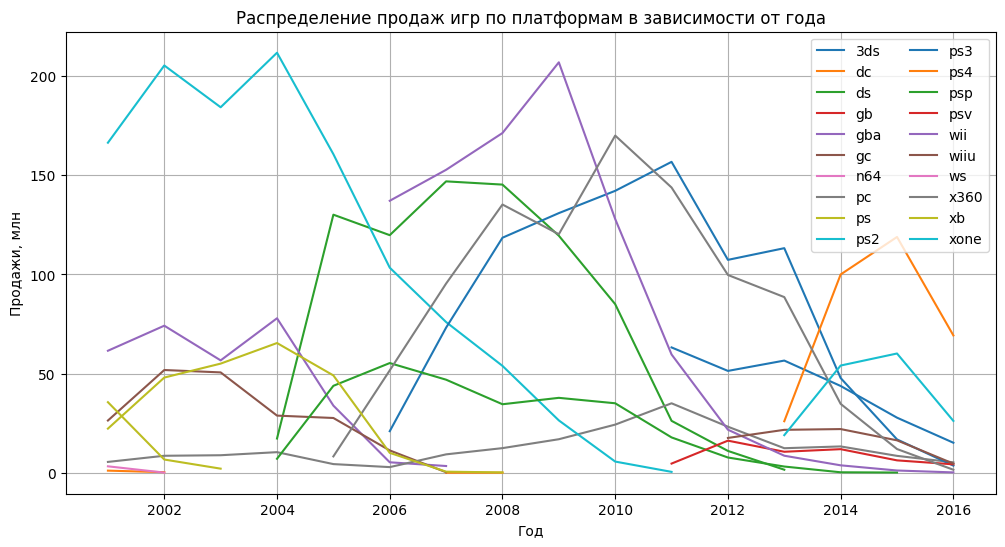

In [16]:
df.pivot_table(
    index=['Year_of_Release'],columns=['Platform'], values='total_sales', aggfunc='sum').plot(
    xlabel='Год',
    ylabel='Продажи, млн',
    title='Распределение продаж игр по платформам в зависимости от года',
    grid=True,
    figsize=(12, 6)
    )
plt.legend (loc='upper right',ncol=2)

### Определение платформ с наибольшими суммарными продажам и построение распределение по годам

<Axes: title={'center': 'Распределение продаж игр по платформам'}, xlabel='Платформа', ylabel='Продажи, млн'>

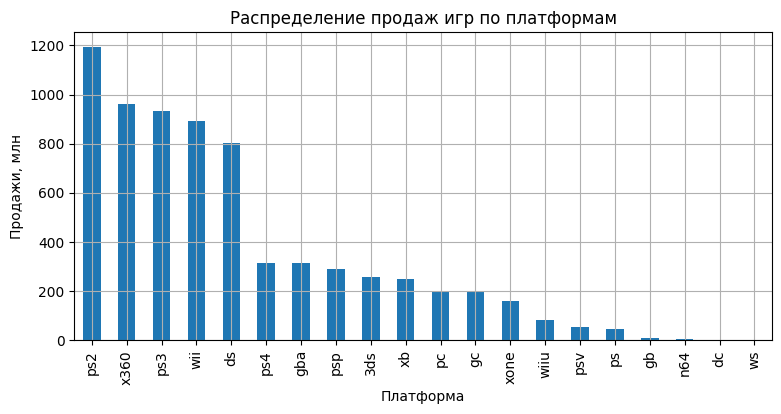

In [17]:
df.groupby('Platform')['total_sales'].sum().sort_values(ascending=False).plot(
    xlabel='Платформа',
    ylabel='Продажи, млн',
    title='Распределение продаж игр по платформам',
    kind='bar',
    grid=True,
    figsize=(9, 4),
    legend=""
    )

Продажи игр на платформах ps2, x360, ps3, wii и ds оказалились более чем в 2 раза больше остальных. Построим для данных платформ распределение по годам.

<Axes: title={'center': 'Распределение продаж по годам'}, xlabel='Год', ylabel='Продажи, млн'>

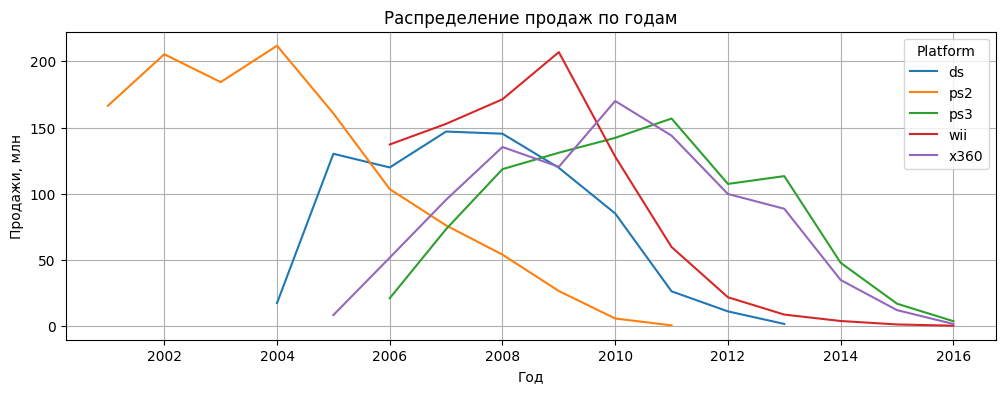

In [18]:
df.loc[df['Platform'].isin(
    list(df.groupby('Platform')['total_sales'].sum().sort_values(ascending=False).index[:5]))].pivot_table(
    index=['Year_of_Release'],columns=['Platform'], values='total_sales', aggfunc='sum').plot(
    xlabel='Год',
    ylabel='Продажи, млн',
    title='Распределение продаж по годам',
    grid=True,
    figsize=(12, 4),
    )

Из данного графика видно, что новые платформы с высоким потенциалом могут появляться не закономерно, а вот исчезновение старых имеет срок примерно 10 лет.

### Определение потенцильно прибыльных платформ

Исходя из вышеприведенных графиков и даиаграмм за "актуальный период" возьмем период 2012-2016гг, когда закончился бум продаж, которое может сильно повлиять на результат анализа.

In [19]:
df=df.loc[df['Year_of_Release']>2011]

Рассмотрим продажи по платформам за актуальный период.

In [20]:
df.pivot_table(
    index=['Year_of_Release'],columns=['Platform'], values='total_sales', aggfunc='sum')

Platform,3ds,ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
Year_of_Release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Рассмотрим суммарную продажу по этим платформам.

In [21]:
df.pivot_table(
    index=['Platform'],values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False)

,total_sales
Platform,
ps4,314.14
ps3,288.79
x360,236.54
3ds,194.61
xone,159.32
wiiu,82.19
pc,62.65
psv,49.18
wii,35.37


Как видно из таблиц лидирующие позиции по продажам за последние 5 лет у платформ ps4, ps3, x360, но если сравнивать по 2016 году список немножко изменился: первое место у ps4, второе-xone, третье - 3ds.

Для сравнения трендов продаж по данным платформам построим следующие линейные графики:

<Axes: title={'center': 'Распределение продаж игр по платформам в зависимости от года'}, xlabel='Год', ylabel='Продажи, млн'>

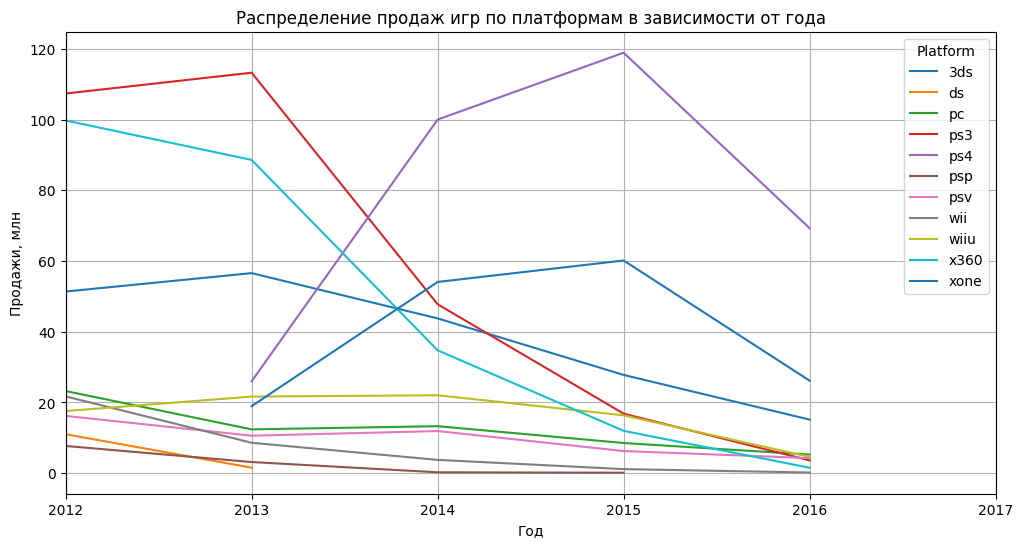

In [22]:
df.pivot_table(
    index=['Year_of_Release'],columns=['Platform'], values='total_sales', aggfunc='sum').plot(
    xlabel='Год',
    ylabel='Продажи, млн',
    title='Распределение продаж игр по платформам в зависимости от года',
    grid=True,
    figsize=(12, 6),
    xlim=(2012,2017)
    )

Из графиков видно что продажи по всем платформам падают. Тогда с учетом трендов за наиболее потенциально прибыльные платформы примем ps4, xone и 3ds. Построим для данных платформ диаграммы размаха продаж.

In [23]:
dfb=df.loc[df['Platform'].isin(['ps4','xone','3ds']),['Platform','total_sales']]

(0.0, 2.0)

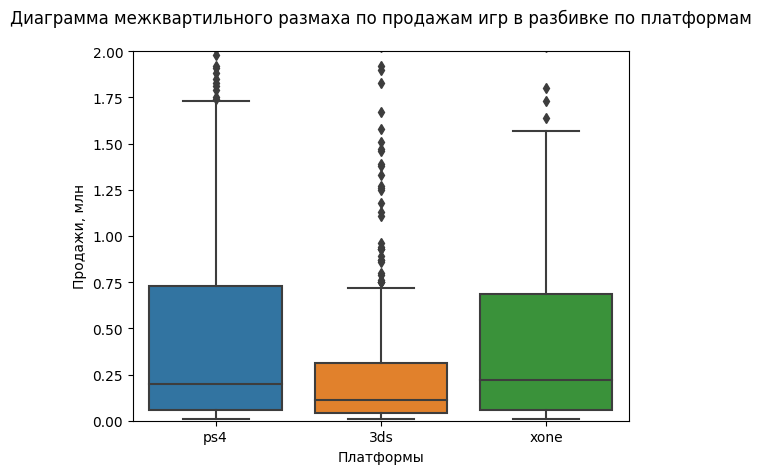

In [24]:
boxplot=sns.boxplot(x=dfb['Platform'], y=dfb['total_sales'])
boxplot.axes.set_title("Диаграмма межквартильного размаха по продажам игр в разбивке по платформам", fontsize=12,pad=20)
boxplot.set_xlabel("Платформы", fontsize=10)
boxplot.set_ylabel("Продажи, млн", fontsize=10)
boxplot.set_ylim(0,2)

У платформ ps4 и xone размах продаж значительно больше у 3ds, то есть у данных платформ более неоднородные продажи.

### Определение зависимости продаж игр внутри платформы ps4 от оценки пользователей и критиков

Построение диаграмм рассеяния продаж игр на ps4 от оценки пользователей и критиков.

<Axes: title={'center': 'Диаграмма рассеяния продаж игр на ps4 от оценки критиков'}, xlabel='Оценки критиков', ylabel='Продажи, млн'>

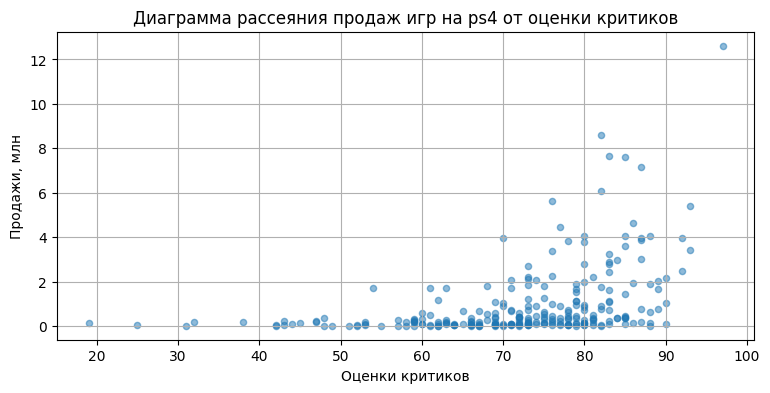

In [25]:
df.loc[df['Platform']=='ps4',['Critic_Score','total_sales']].plot(
    x='Critic_Score',
    y='total_sales',
    xlabel='Оценки критиков',
    ylabel='Продажи, млн',
    title='Диаграмма рассеяния продаж игр на ps4 от оценки критиков',
    kind='scatter',
    alpha=0.5,
    grid=True,
    figsize=(9, 4),
    legend=""
    )

<Axes: title={'center': 'Диаграмма рассеяния продаж игр на ps4 от оценки пользователей'}, xlabel='Оценки пользователей', ylabel='Продажи, млн'>

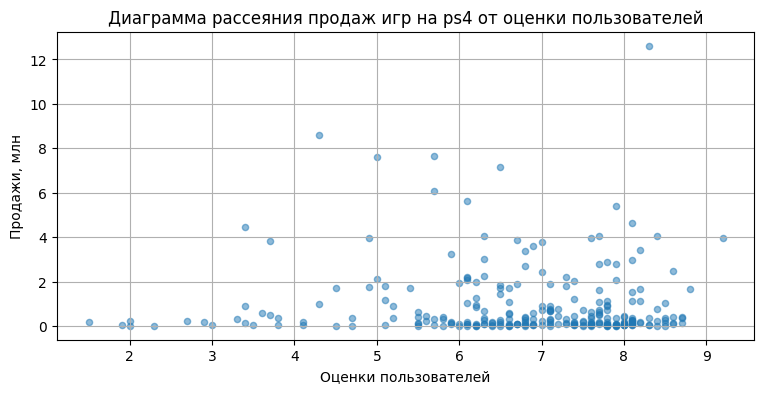

In [26]:
df.loc[df['Platform']=='ps4',['User_Score','total_sales']].plot(
    x='User_Score',
    y='total_sales',
    xlabel='Оценки пользователей',
    ylabel='Продажи, млн',
    title='Диаграмма рассеяния продаж игр на ps4 от оценки пользователей',
    kind='scatter',
    alpha=0.5,
    grid=True,
    figsize=(9, 4),
    legend=""
    )

Построение тепловой карты продаж игр на ps4 с оценками пользователей и критиков.

Text(0.5, 1.0, 'Корреляция оценок пользователей и критиков с продажами игр на ps4')

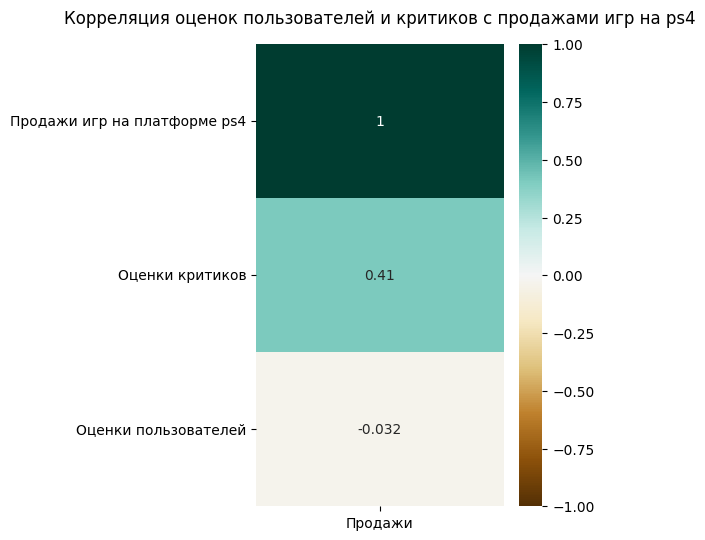

In [27]:
dfh=df.loc[df['Platform']=='ps4',['Critic_Score','User_Score','total_sales']]
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(dfh.corr()[['total_sales']].sort_values(
    by='total_sales', ascending=False),
    vmin=-1, vmax=1, annot=True,
    cmap='BrBG',
    xticklabels=['Продажи'],
    yticklabels=['Продажи игр на платформе ps4','Оценки критиков','Оценки пользователей',])
heatmap.set_title('Корреляция оценок пользователей и критиков с продажами игр на ps4',
    fontdict={'fontsize':12}, pad=15)

Как видно из диаграмм рассеяния и тепловой карты продажи имеют "среднюю" зависимость от оценки критиков, а от оценки пользователей почти не зависят.

### Определение зависимости продаж игр на других платформах от оценки пользователей и критиков

Text(0.5, 1.0, 'Корреляция оценок пользователей и критиков с продажами игр на 3ds')

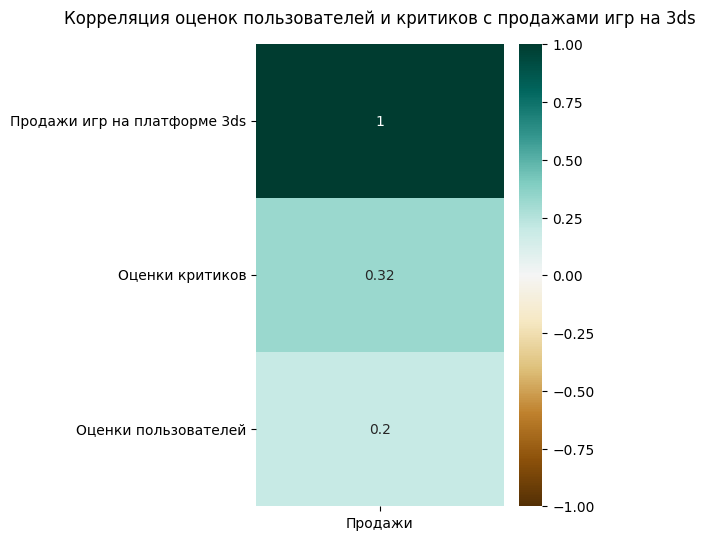

In [28]:
dfh=df.loc[df['Platform']=='3ds',['Critic_Score','User_Score','total_sales']]
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(dfh.corr()[['total_sales']].sort_values(
    by='total_sales', ascending=False),
    vmin=-1, vmax=1, annot=True,
    cmap='BrBG',
    xticklabels=['Продажи'],
    yticklabels=['Продажи игр на платформе 3ds','Оценки критиков','Оценки пользователей',])
heatmap.set_title('Корреляция оценок пользователей и критиков с продажами игр на 3ds',
    fontdict={'fontsize':12}, pad=15)

Text(0.5, 1.0, 'Корреляция оценок пользователей и критиков с продажами игр на xone')

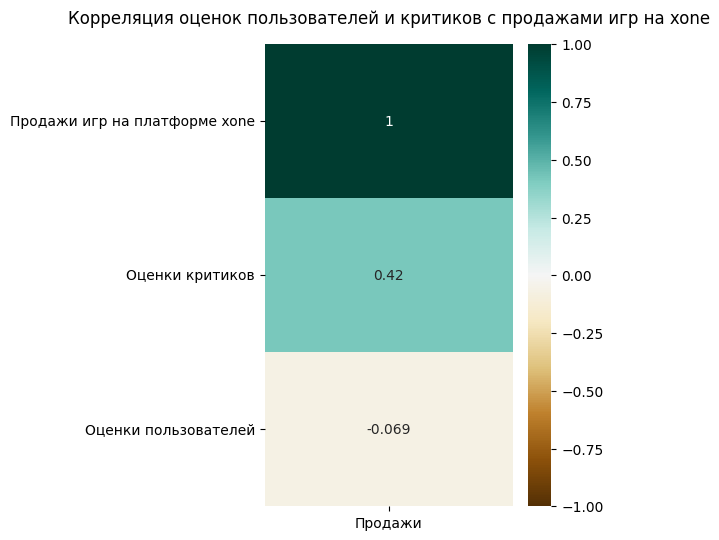

In [29]:
dfh=df.loc[df['Platform']=='xone',['Critic_Score','User_Score','total_sales']]
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(dfh.corr()[['total_sales']].sort_values(
    by='total_sales', ascending=False),
    vmin=-1, vmax=1, annot=True,
    cmap='BrBG',
    xticklabels=['Продажи'],
    yticklabels=['Продажи игр на платформе xone','Оценки критиков','Оценки пользователей',])
heatmap.set_title('Корреляция оценок пользователей и критиков с продажами игр на xone',
    fontdict={'fontsize':12}, pad=15)

Для платформе 3ds и xone продажи зависят "средне" от оценки критиков, а от оценки пользователей больше чем на ps4.

### Определение наиболее прибыльных жанров игр

<Axes: title={'center': 'Распределение продаж игр на всех платформах по жанрам'}, xlabel='Жанр', ylabel='Продажи, млн'>

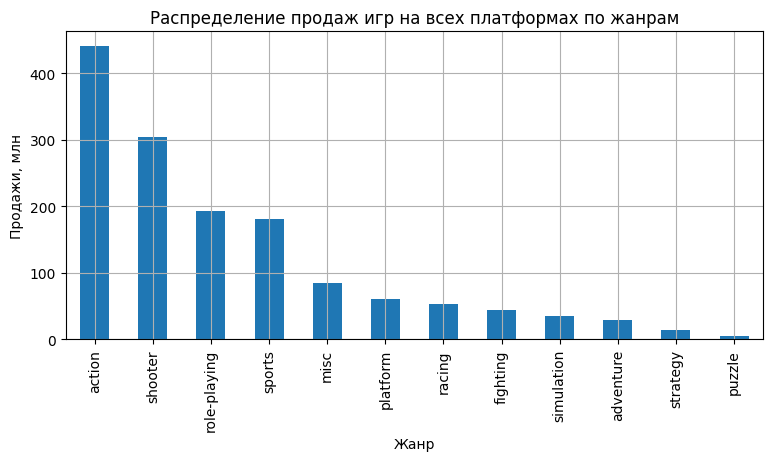

In [30]:
df.groupby('Genre')['total_sales'].sum().sort_values(ascending=False).plot(
    xlabel='Жанр',
    ylabel='Продажи, млн',
    title='Распределение продаж игр на всех платформах по жанрам',
    kind='bar',
    grid=True,
    figsize=(9, 4),
    legend=""
    )

<Axes: title={'center': 'Распределение продаж игр на популярных платформах по жанрам'}, xlabel='Жанр', ylabel='Продажи, млн'>

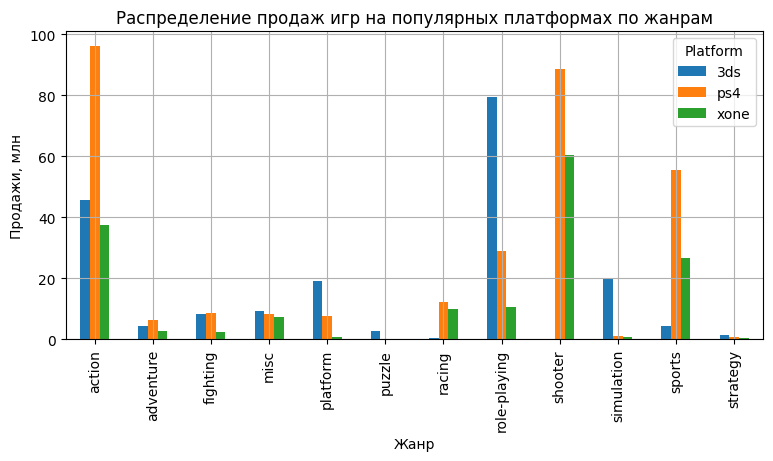

In [31]:
df.loc[df['Platform'].isin(['ps4','xone','3ds'])].pivot_table(
    index=['Genre'],columns='Platform',values='total_sales', aggfunc='sum').plot(
    xlabel='Жанр',
    ylabel='Продажи, млн',
    title='Распределение продаж игр на популярных платформах по жанрам',
    kind='bar',
    grid=True,
    figsize=(9, 4)
    )

Определены популярные жанры в зависимости от платформ:

|Платформа|ps4|xone|3ds|
|:-----|:----:|----:|----:|
|Жанр №1|action|shooter| role-playing |
|Жанр №2|shooter |action|action |
|Жанр №3| sports| sports| simulation|

<Axes: title={'center': 'Распределение продаж игр по жанрам в зависимости от года'}, xlabel='Год', ylabel='Продажи, млн'>

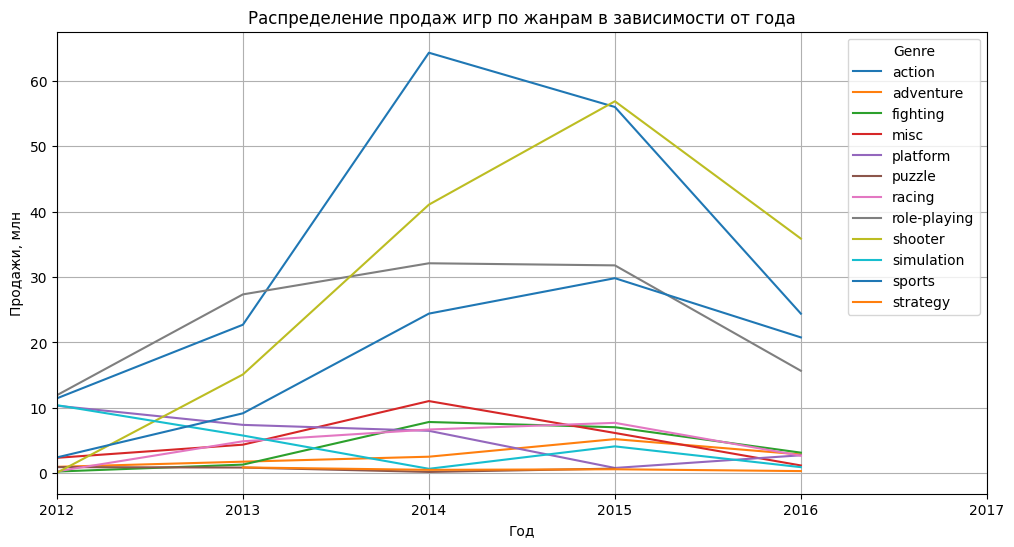

In [32]:
df.loc[df['Platform'].isin(['ps4','xone','3ds'])].pivot_table(
    index=['Year_of_Release'],columns=['Genre'], values='total_sales', aggfunc='sum').plot(
    xlabel='Год',
    ylabel='Продажи, млн',
    title='Распределение продаж игр по жанрам в зависимости от года',
    grid=True,
    figsize=(12, 6),
    xlim=(2012,2017)
    )

Как видно из графиков популярность жанров action, shooter, sports, role-playing со временем падает, но все равно занимают лидирующие позиции.

### Вывод

- Потенциально прибыльными платформами на 2017 год избраны ps4, xone и 3ds;
- Продажи зависят в большей степени от оценок критиков, чем от оценок пользователей;
- Наиболее популярными жанрами на популярных платформах являются  action, sport, shooter, role-playing, simulation.

## Портреты пользователей каждого региона

### Топ-5 самых популярных платформ

<div class="alert alert-success">

**Комментарий ревьюера**

Отлично, исправления принял</div>

<Axes: title={'center': 'Распределение продаж игр на всех платформах по регионам'}, xlabel='Платформа', ylabel='Продажи, млн'>

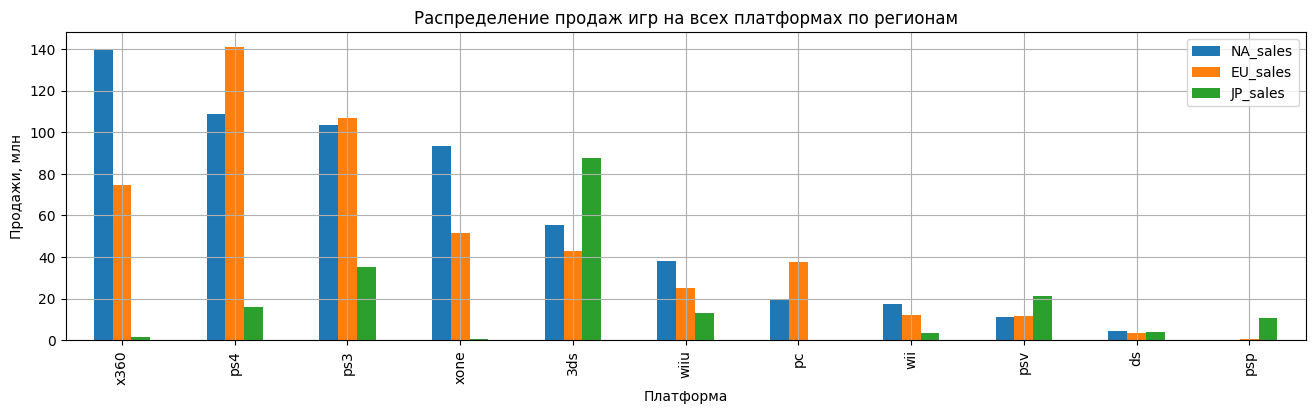

In [33]:
df.groupby('Platform')[['NA_sales','EU_sales','JP_sales']].sum().sort_values(
    by='NA_sales', ascending=False).plot(
    xlabel='Платформа',
    ylabel='Продажи, млн',
    title='Распределение продаж игр на всех платформах по регионам',
    kind='bar',
    grid=True,
    figsize=(16, 4),
    )

In [34]:
def top5_platform(region):
    data=pd.DataFrame(df.groupby('Platform')[region].sum().sort_values(ascending=False).head())
    summ=df.groupby('Platform')[region].sum().sum()
    data['Доли продаж, %']=(data/summ*100).round(1)
    data=data.rename({region: 'Продажи, млн.'}, axis=1)
    return display(data)

In [35]:
print('Топ 5 популярных платформ в Северной Америке:')
top5_platform('NA_sales')
print()
print('Топ 5 популярных платформ в Европе:')
top5_platform('EU_sales')
print()
print('Топ 5 популярных платформ в Японии:')
top5_platform('JP_sales')

Топ 5 популярных платформ в Северной Америке:


,"Продажи, млн.","Доли продаж, %"
Platform,,
x360,140.05,23.7
ps4,108.74,18.4
ps3,103.38,17.5
xone,93.12,15.8
3ds,55.31,9.4



Топ 5 популярных платформ в Европе:


,"Продажи, млн.","Доли продаж, %"
Platform,,
ps4,141.09,27.8
ps3,106.86,21.1
x360,74.52,14.7
xone,51.59,10.2
3ds,42.64,8.4



Топ 5 популярных платформ в Японии:


,"Продажи, млн.","Доли продаж, %"
Platform,,
3ds,87.79,45.6
ps3,35.29,18.3
psv,21.04,10.9
ps4,15.96,8.3
wiiu,13.01,6.8


В Северной Америке лидирует приставка Xbox 360 (x360) с долей продаж 23,7%, тогда как в Европе 14,7%, а в Японии даже не входит в топ 5. Это объясняется тем, что разработчиком приставки Xbox 360 является компания из Северной Америки, а значит цена там дешевле и более адаптирован для местных клиентов.

В Японии, очевидно, более популярные приставки местных разработчиков такие как Nintendo 3DS (3ds) с огромной долей продаж 45.6% и разные версии Playstation (ps2, psv, ps4). Следует отметить, что приставки Playstation и их новые модели получили популярность во всем мире, поэтому в Северной Америке приставка Playstation 4 стоит на втором месте с долей продаж 18.4%, а в Европе на первом месте с долей продаж 27,8%.

### Топ-5 самых популярных жанров

<Axes: title={'center': 'Распределение продаж игр по жанрам и по регионам'}, xlabel='Жанр', ylabel='Продажи, млн'>

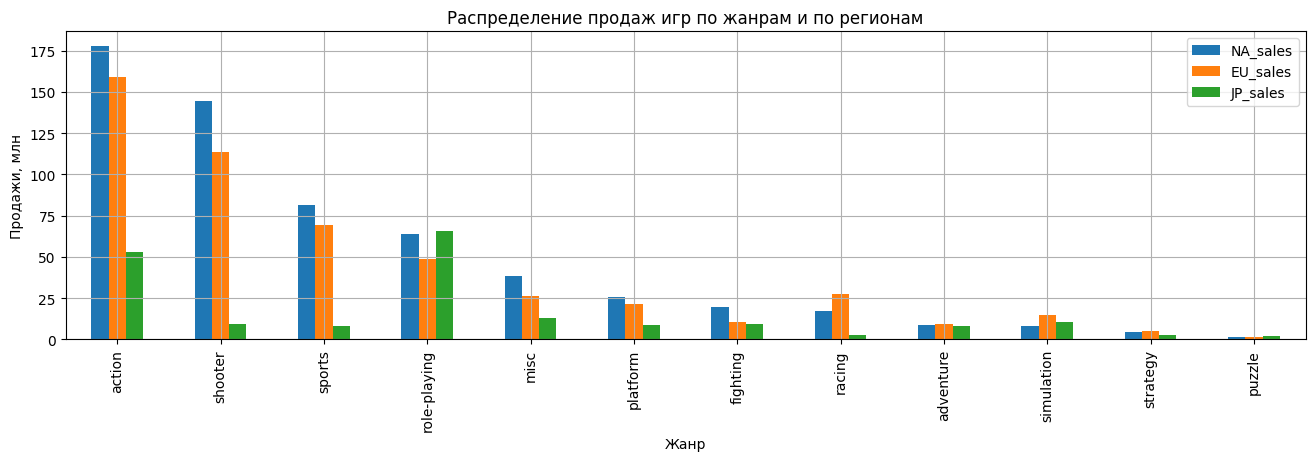

In [36]:
df.groupby('Genre')[['NA_sales','EU_sales','JP_sales']].sum().sort_values(
    by='NA_sales', ascending=False).plot(
    xlabel='Жанр',
    ylabel='Продажи, млн',
    title='Распределение продаж игр по жанрам и по регионам',
    kind='bar',
    grid=True,
    figsize=(16, 4),
    )

In [37]:
def top5_genre(region):
    data=pd.DataFrame(df.groupby('Genre')[region].sum().sort_values(ascending=False).head())
    summ=df.groupby('Genre')[region].sum().sum()
    data['Доли продаж, %']=(data/summ*100).round(1)
    data=data.rename({region: 'Продажи, млн.'}, axis=1)
    return display(data)

In [38]:
print('Топ 5 популярных жанров в Северной Америке:')
top5_genre('NA_sales')
print()
print('Топ 5 популярных жанров в Европе:')
top5_genre('EU_sales')
print()
print('Топ 5 популярных жанров в Японии:')
top5_genre('JP_sales')

Топ 5 популярных жанров в Северной Америке:


,"Продажи, млн.","Доли продаж, %"
Genre,,
action,177.84,30.1
shooter,144.77,24.5
sports,81.53,13.8
role-playing,64.00,10.8
misc,38.19,6.5



Топ 5 популярных жанров в Европе:


,"Продажи, млн.","Доли продаж, %"
Genre,,
action,159.34,31.4
shooter,113.47,22.4
sports,69.09,13.6
role-playing,48.53,9.6
racing,27.29,5.4



Топ 5 популярных жанров в Японии:


,"Продажи, млн.","Доли продаж, %"
Genre,,
role-playing,65.44,34.0
action,52.80,27.4
misc,12.86,6.7
simulation,10.41,5.4
fighting,9.44,4.9


Во всех регионах популярные жанры почти одни и те же. Жанры:экшен (action), стрелялки (shooter), ролевые игры (role-playing) встречаются во всех регионах. Единственное, в Японии жанр role-playing самое популярное с долей продаж 34%, тогда как в Северной Америке и Европе этот процент составляет в среднем 10.2%.Это может быть из-за того, что большинство игр данного жанра было разработано в Японии и в первую очередь для внутреннего японского рынка.


### Определение влияния рейтинга ESRB на продажи в отдельном регионе

<Axes: title={'center': 'Зависимость количества продаж в регионах от рейтинга ESRB'}, xlabel='Рейтинг ESRB', ylabel='Количество продаж игр, млн.'>

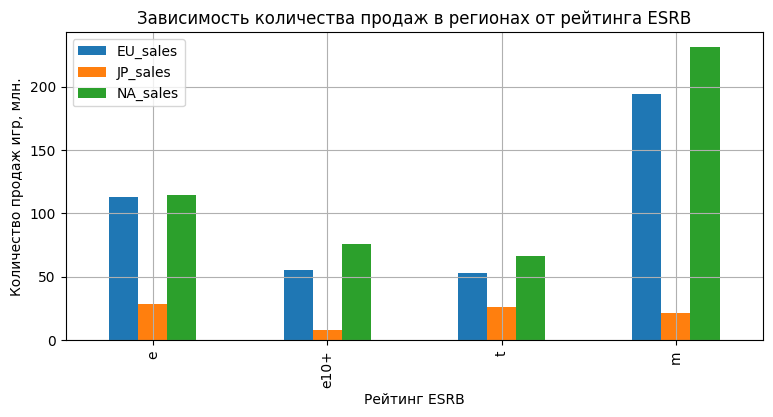

In [39]:
df.Rating= pd.Categorical(df.Rating,
                      categories=["e","e10+","t","m"],
                      ordered=True)
df.pivot_table(index='Rating', values=['NA_sales','EU_sales','JP_sales'], aggfunc='sum').plot(
    xlabel='Рейтинг ESRB',
    ylabel='Количество продаж игр, млн.',
    title='Зависимость количества продаж в регионах от рейтинга ESRB',
    kind='bar',
    grid=True,
    figsize=(9, 4))

В Северной Америке и в Европе продажи игр с возрастной категорией «M» (от 17 лет) заметно больше чем по остальным категориям. Следом за категорией «М» идет категория «Е» (от 6 лет), а самые непопулярные категории «Е10+» ( от 10 лет) и «Т» (от 13 лет). В Японии же картина чуть иная, первое и второе  место занимают категории «Е» и «Т», затем «М» и «Е10+».

### Вывод

- Самой популярной платформой в Северной Америке является Xbox 360 (местный разработчик), в Европе - Playstation 4, в Японии - Nintendo 3DS(местный разработчик). Самым популярным во всем мире входящим в топ-5 являются приставки Playstation-3,4;

- В Северной Америке и в Европе самые популярные жанры экшен (action) и cтрелялки (shooter), в Японии жанр-ролевые игры (role-playing), затем экшен (action).

- В Северной Америке и в Европе продажи игр с возрастной категорией «M» (от 17 лет) заметно больше чем по остальным категориям, а Японии же картина чуть иная, первое и второе  место разделяют категории «Е» и «Т».

## Проверка гипотез

### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Функция для построения гистограмм и вычисления статистических данных датасета.

In [40]:
def hist_stat(name,platform,k):
    data=df.loc[df['Platform']==platform, 'User_Score']
    data.plot(
        bins=k,
        title='Распределение '+ name,
        kind='hist',
        grid=True,
        figsize=(9, 4),
        legend="",
        xlim=(0,10)
        )
    print('Cтатистические показатели :')
    print(data.agg(['count','mean','median','min','max',np.var,np.std]))

Построение гиcтограммы распределения рейтингов пользователей по платформе Xbox One.

Cтатистические показатели :
count     182.000000
mean        6.521429
median      6.800000
min         1.600000
max         9.200000
var         1.906997
std         1.380941
Name: User_Score, dtype: float64


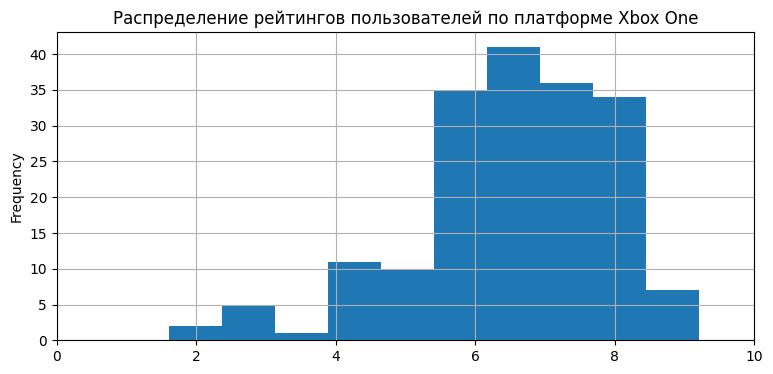

In [41]:
hist_stat('рейтингов пользователей по платформе Xbox One','xone',10)

Построение гиcтограммы распределения рейтингов пользователей по платформе PC.

Cтатистические показатели :
count     206.000000
mean        6.428641
median      6.800000
min         1.400000
max         9.300000
var         2.770444
std         1.664465
Name: User_Score, dtype: float64


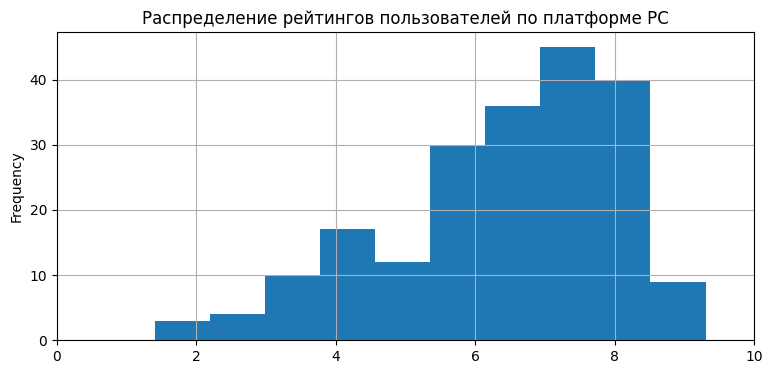

In [42]:
hist_stat('рейтингов пользователей по платформе PC','pc',10)

Примем следующие гипотезы:

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны;

Альтернативная: средние пользовательские рейтинги платформ Xbox One и PC не равны.

Значит, если нулевая гипотеза отвергается, то скорее всего средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [43]:
alpha =0.05
results = st.ttest_ind(df.loc[(df['Platform']=='xone')&(df['User_Score']>0),'User_Score'],
                       df.loc[(df['Platform']=='pc')&(df['User_Score']>0),'User_Score'],
                       equal_var = False) #значение False, так как дисперсии выборок различаются
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


#### Вывод

Результат Т-теста показал, что с вероятностью почти 55% различие между средними пользовательскими рейтингами платформ Xbox One и PC можно получить случайно. Значит не отвергаем нулевую гипотезу и тогда гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны скорее всего верна.

### Проверка гипотезы: cредние пользовательские рейтинги жанров Action и Sports разные.

Функция для построения гистограмм и вычисления статистических данных датасета.

In [44]:
def hist_stat2(name,genre,k):
    data=df.loc[df['Genre']==genre, 'User_Score']
    data.plot(
        bins=k,
        title='Распределение '+ name,
        kind='hist',
        grid=True,
        figsize=(9, 4),
        legend="",
        xlim=(0,10)
        )
    print('Cтатистические показатели :')
    print(data.agg(['count','mean','median','min','max',np.var,np.std]))

Построение гиcтограммы распределения рейтингов пользователей по жанру Action.

Cтатистические показатели :
count     523.000000
mean        6.825048
median      7.100000
min         1.600000
max         9.100000
var         1.889084
std         1.374440
Name: User_Score, dtype: float64


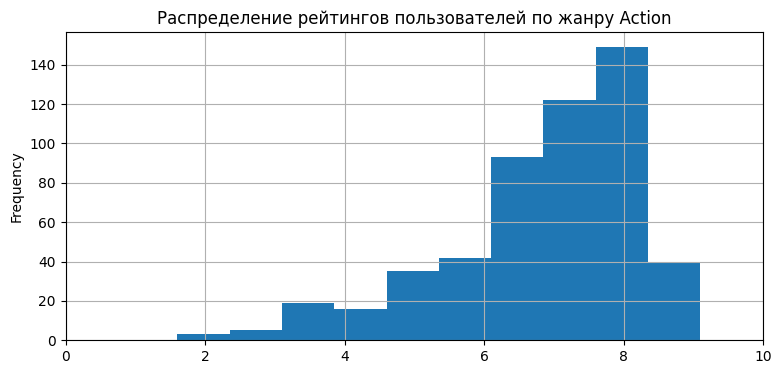

In [45]:
hist_stat2('рейтингов пользователей по жанру Action','action',10)

Построение гиcтограммы распределения рейтингов пользователей по жанру Sports.

Cтатистические показатели :
count     195.000000
mean        5.455897
median      5.700000
min         0.200000
max         8.800000
var         3.022890
std         1.738646
Name: User_Score, dtype: float64


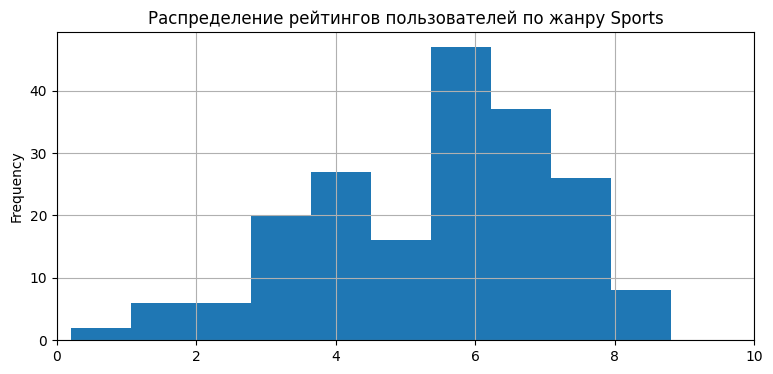

In [46]:
hist_stat2('рейтингов пользователей по жанру Sports','sports',10)

Примем следующие гипотезы:

Нулевая гипотеза: cредние пользовательские рейтинги жанров Action и Sports равны;

Альтернативная: cредние пользовательские рейтинги жанров Action и Sports не равны.

Значит, если нулевая гипотеза отвергается, то скорее всего средние пользовательские рейтинги жанров Action и Sports не равны.

In [47]:
alpha =0.05
results = st.ttest_ind(df.loc[(df['Genre']=='action')&(df['User_Score']>0),'User_Score'],
                       df.loc[(df['Genre']=='sports')&(df['User_Score']>0),'User_Score'],
                       equal_var = False) #значение False, так как дисперсии выборок различаются
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


#### Вывод

Результат Т-теста показал, что с вероятностью почти 100% различие между средними пользовательскими рейтингами жанров Action и Sports можно получить не случайно. Значит отвергаем нулевую гипотезу и тогда гипотеза: средние пользовательские рейтинги жанров Action и Sports разные скорее всего верна.

##  Вывод

В первой части проекта была выполнена подготовка данных: загрузка, вывод, изменение типов данных, приведение к нижнему регистру всех строковых значений, в столбце рейтинга пользователя все значения "tbd" заменены на пропуски, все пропуски не были заполнены для исключения достоверности расчетов и анализов.

Во второй части был проведен анализ продаж по годам и определен "актуальный период", принятый за 2012-2016 гг., когда закончился бум продаж, которое может сильно повлиять на результат анализа. С учетом трендов продаж за наиболее потенциально прибыльные платформы приняты Playstation 4, Xbox ONE и Nintendo 3DS. Выявена корреляция равная в среднем 0,39 между продажами и оценкой критиков. Также определены популярные жанры в зависимости от платформ:

|Платформа|ps4|xone|3ds|
|:-----|:----:|----:|----:|
|Жанр №1|action|shooter| role-playing |
|Жанр №2|shooter |action|action |
|Жанр №3| sports| sports| simulation|

В третьей части определены топ-5 самых популярных платформ и жанров в зависисмости от региона. Самой популярной платформой в Северной Америке оказался Xbox 360, в Европе - Playstation 4, в Японии - Nintendo 3DS. Самым популярным во всем мире входящим везде в топ-5 приставки Playstation-3,4. Самыми популярными жанрами в Северной Америке и в Европе оказались экшен (action) и cтрелялки (shooter), в Японии жанр-ролевые игры (role-playing), затем экшен (action). Также было определены наиболее популярные рейтинги ERSB: В Северной Америке и в Европе возрастная категория «M» (от 17 лет) заметно больше чем по остальным категориям, а Японии первое и второе место разделяют категории «Е» и «Т».

В четвертой части были проверены 2 гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Обе гипотезы не опровергнуты, значит скорее всего они верны.

В итоге характеристики игры, определяющие ее успешность и на которые нужно сделать ставку и спланировать рекламные кампании на 2017 год в зависимости от региона, являются:

|Характеристика|Северная Америка|Европа|Япония|
|:-----|:----:|----:|----:|
|Платформа|Xbox ONE|Playstation 4| Nintendo 3DS |
|Жанр|Action |Action|RPG |
|Рейтинг ESRB|  M| M| E и Т|

Также игра должна быть с высоким рейтингом критиков, так как с этим параметров есть положительная корреляция продаж.